In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Read the dataset to the python environment.

In [2]:
filename='Downloads/cars_data.csv'
data=pd.read_csv(filename)
data

,Make,Model,Nickname,Car Gender,Buyer Gender,Buyer Age,Buzzword,Country,City,Dealer Latitude,Dealer Longitude,Color,New Car,Purchase Date,Sale Price,Discount,Resell Price,5-yr Depreciation,Top Speed,0-60 Time
0,Suzuki,Vitara,Philippine,Female,Female,51,User-friendly,Belgium,Antwerpen,51.247239,4.440346,Yellow,False,19/07/2009,54806.14,0.2467,33858.32,0.13,200.9,11.5
1,Honda,S2000,Henrik,Male,Male,30,analyzing,China,Jinhu,33.025433,119.020584,Crimson,False,26/10/2015,51826.30,0.3147,2989.28,0.02,158.5,8.8
2,BMW,Z4,Lebbie,Male,Female,54,software,China,Gemo,30.916207,121.677640,Khaki,False,28/03/2010,82929.14,0.5414,35049.16,0.24,149.5,14.4
3,Toyota,Tacoma,Jefferey,Female,Male,68,monitoring,Portugal,Queluz de Baixo,38.745168,-9.267087,Puce,False,07/05/2008,56928.66,0.0850,8236.15,0.20,153.3,11.5
4,Ford,Festiva,Glendon,Female,Male,70,Sharable,Latvia,Jaunpils,56.729980,23.016588,Yellow,False,01/06/2008,77201.26,0.1642,32765.76,0.18,122.0,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Mazda,Tribute,Cooper,Male,Male,44,hardware,Pakistan,Chishtiān Mandi,29.919386,73.074787,Pink,False,05/01/2020,58580.65,0.1611,42640.82,0.14,245.8,8.0
9996,GMC,Sierra 2500,Dud,Male,Male,40,Enhanced,Costa Rica,Ángeles,10.075000,-84.241523,Puce,False,28/12/2005,75229.74,0.2691,21115.58,0.11,147.4,12.3
9997,Mercury,Mariner,Chariot,Male,Male,37,monitoring,Poland,Dąbrowice,52.311923,19.084965,Blue,False,08/03/2013,34755.44,0.2493,2731.25,0.12,198.1,11.8
9998,Daewoo,Leganza,Dynah,Female,Female,21,cohesive,Philippines,Villasis,15.901640,120.587828,Teal,True,21/02/2008,98725.42,0.4654,18718.58,0.04,206.7,12.2


# 2. Check for the null values present in the dataset.

In [3]:
data.isnull().sum()

Make                 0
Model                0
Nickname             0
Car Gender           0
Buyer Gender         0
Buyer Age            0
Buzzword             0
Country              0
City                 0
Dealer Latitude      0
Dealer Longitude     0
Color                0
New Car              0
Purchase Date        0
Sale Price           0
Discount             0
Resell Price         0
5-yr Depreciation    0
Top Speed            0
0-60 Time            0
dtype: int64

Insights-

There are no null values in the given data

# 3. Plot a bar graph of male vs female buyers participated in the sales.

1.Bar Graph of male vs female buyers participated in the sales

In [4]:
Buyer = data['Buyer Gender'].value_counts().to_frame().reset_index()
Buyer 

,index,Buyer Gender
0,Female,5052
1,Male,4948


Text(0, 0.5, 'Count')

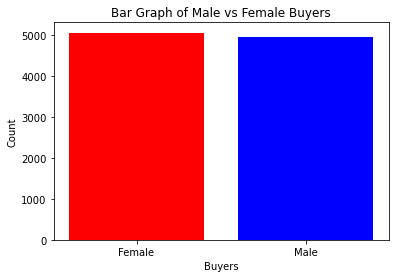

In [5]:
plt.bar(Buyer['index'],Buyer['Buyer Gender'],color = ['red','blue'])
plt.title('Bar Graph of Male vs Female Buyers')
plt.xlabel('Buyers')
plt.ylabel('Count') 

Insights -

The number of female buyers is more than that of the male buyers participated in the sale.

2.Representation of Buyer Gender using the Multiple Bar graph

In [6]:
data2=pd.DataFrame(data[['Make','Buyer Gender']].value_counts().to_frame())
data2=data2.head(9)
data2

0
Make      Buyer Gender     
Ford      Female        444
          Male          420
Chevrolet Male          403
          Female        397
Dodge     Female        251
          Male          249
Toyota    Female        234
GMC       Male          232
          Female        222

In [7]:
data2=data2.drop(['Toyota'],axis=0)
data2

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


0
Make      Buyer Gender     
Ford      Female        444
          Male          420
Chevrolet Male          403
          Female        397
Dodge     Female        251
          Male          249
GMC       Male          232
          Female        222

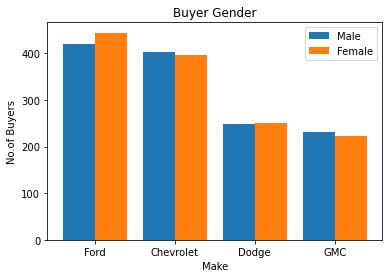

In [8]:
w=0.4
X=['Ford','Chevrolet','Dodge','GMC']
Male=[420,403,249,232]
Female=[444,397,251,222]
bar1=np.arange(len(X))
plt.bar(bar1,Male,w,label="Male")
bar2=[i+w for i in bar1]
plt.bar(bar2,Female,w,label="Female")
plt.xticks(bar1+w/2,X)
plt.xlabel('Make')
plt.ylabel('No.of Buyers')
plt.title('Buyer Gender')
plt.legend()

Insights-

1.The difference between the number of male buyers and female buyers who participated in the sale is maximum in the case 
of Ford among the four samples considered.

2.The difference between the number of male buyers and female buyers who participated in the sale is minimum in the case 
of Dodge among the four samples considered.


# 4. Find the top 5 cars based on their sales price.

1.#using nlargest()

In [9]:
top_cars=data.groupby(by='Make')['Sale Price'].nlargest(5)
top_cars


Make       
Acura  5474    99303.08
       7047    99129.00
       8228    98983.21
       7849    98464.04
       4513    97865.83
                 ...   
Volvo  2533    99382.92
       5036    98355.95
       6404    98068.48
       1591    96950.18
       6673    96878.08
Name: Sale Price, Length: 323, dtype: float64

In [10]:
pd.set_option('max_rows',None)
top_cars

Make               
Acura          5474    99303.08
               7047    99129.00
               8228    98983.21
               7849    98464.04
               4513    97865.83
Alfa Romeo     3457    90078.87
               3078    89148.38
               7876    87958.19
               6974    86450.75
               9419    64220.48
Aptera         8651    83016.73
               2401    78518.06
               2252    53694.16
               6606    47278.26
Aston Martin   9100    99506.62
               4765    97899.09
               805     96208.13
               3114    95429.74
               1533    95235.76
Audi           1270    99991.91
               1138    99396.59
               9863    99384.19
               6101    99376.44
               1122    98889.53
Austin         717     95199.24
               3133    73815.19
               4670    42735.73
               2788    39226.60
               8241    14077.80
BMW            3393    99814.48
               834  

Insights-

The top five cars based on their sale price are : Acura,Alfa Romeo,Aptera,Aston Martin,Audi.

2.using max()

In [11]:
top_cars=data.groupby(by='Make')['Sale Price'].max()
top_cars

Make
Acura            99303.08
Alfa Romeo       90078.87
Aptera           83016.73
Aston Martin     99506.62
Audi             99991.91
Austin           95199.24
BMW              99814.48
Bentley          98315.87
Bugatti          49160.67
Buick            99359.08
Cadillac         99334.92
Chevrolet        99932.74
Chrysler         99656.21
Citroën          92752.02
Corbin           13270.10
Daewoo           98725.42
Daihatsu         59994.33
Dodge            99908.29
Eagle            92441.07
Ferrari          99795.06
Fiat             48420.14
Fillmore         41778.53
Ford             99837.56
GMC              99744.76
Geo              81083.54
Hillman          99857.73
Holden           99763.83
Honda            99943.77
Hummer           98961.70
Hyundai          99072.86
Infiniti         99764.34
Isuzu            99909.20
Jaguar           99599.61
Jeep             93454.97
Jensen           83364.31
Kia              98709.71
Lamborghini      99966.56
Land Rover       99601.33
Lexus  

Insights-

The top five cars based on their sale price are : Acura,Alfa Romeo,Aptera,Aston Martin,Audi.

# 5. Find the least 5 cars based on their Resell price.

1.Using min() 

In [12]:
least_cars=data.groupby(by='Make')['Resell Price'].min()
least_cars

Make
Acura             2092.06
Alfa Romeo        4960.23
Aptera            8716.20
Aston Martin      2231.80
Audi              2604.70
Austin           10823.78
BMW               2032.28
Bentley           5882.23
Bugatti           8880.42
Buick             2207.24
Cadillac          2148.19
Chevrolet         2000.84
Chrysler          2333.95
Citroën           8104.89
Corbin           23699.97
Daewoo            3598.10
Daihatsu          6679.71
Dodge             2120.15
Eagle             2347.88
Ferrari           2160.65
Fiat             31807.95
Fillmore          3175.68
Ford              2043.44
GMC               2005.44
Geo               6464.02
Hillman          46868.52
Holden            2918.06
Honda             2038.14
Hummer            2593.52
Hyundai           2021.75
Infiniti          2017.83
Isuzu             2993.98
Jaguar            2014.09
Jeep              2063.00
Jensen           44581.43
Kia               2303.26
Lamborghini       2124.01
Land Rover        2189.36
Lexus  

Insights-

The least five cars based on their resell price are : Acura,Alfa Romeo,Aptera,Aston Martin,Audi.

2.Using nsmallest()


In [13]:
least_cars=data.groupby(by='Make')['Resell Price'].nsmallest(5)
least_cars


Make               
Acura          2958     2092.06
               4863     2139.11
               6795     2209.56
               7345     3191.43
               5643     3221.68
Alfa Romeo     6183     4960.23
               3078    12752.81
               3457    17596.65
               4151    29719.30
               7876    39427.71
Aptera         2252     8716.20
               6606    31943.94
               8651    46366.34
               2401    47503.21
Aston Martin   1533     2231.80
               7696     2274.18
               6555     2753.05
               191      3540.51
               5872     3654.36
Audi           9570     2604.70
               7360     2694.57
               5377     2823.28
               4431     3071.06
               6365     3230.67
Austin         4670    10823.78
               8241    18275.53
               717     24758.21
               2788    41001.20
               3133    44141.52
BMW            4475     2032.28
               1182 

Insights-

The least five cars based on their resell price are : Acura,Alfa Romeo,Aptera,Aston Martin,Audi.